In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import json,pickle
from sklearn.impute import KNNImputer

## Problem statement

In [2]:
## check wheather the user has heart dieseas or not

## Data Gathering

In [3]:
df=pd.read_csv('heart.csv')
df.head(2)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   

   ca  thal  target  
0   0     1       1  
1   0     2       1

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
## data has not having nan value 

## countplot

<AxesSubplot:xlabel='sex', ylabel='count'>

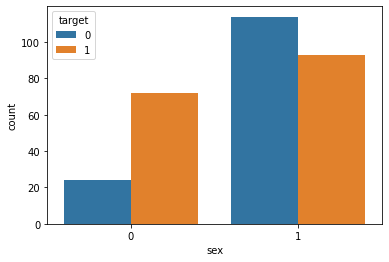

In [6]:
sns.countplot(x="sex",hue="target",data=df)  ##from data we can conclude female has high chance of heart diesease then men

In [7]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

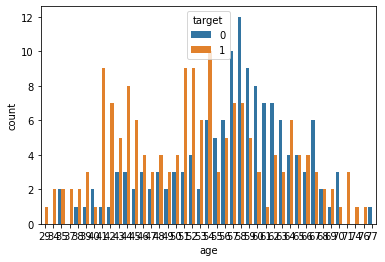

In [8]:
sns.countplot(x="age",hue="target",data=df)

In [9]:
x=df.drop(columns="target")
y=df['target']

## Train test split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20,stratify=y)

## Model implimation

In [11]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred=tree_model.predict(x_test)
y_pred[:6]

array([0, 0, 1, 1, 1, 1], dtype=int64)

In [13]:
y_test[:6]  #first 6 sample correctly predict so we check accuracy and performance matrice

172    0
261    0
142    1
114    1
43     1
137    1
Name: target, dtype: int64

## Test data evalution

In [14]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
print('*'*89)
cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix",cnf)
print('*'*89)
cls_rep=classification_report(y_test,y_pred)
print("classification report",cls_rep)

accuracy 0.7540983606557377
*****************************************************************************************
confusion matrix [[23  5]
 [10 23]]
*****************************************************************************************
classification report               precision    recall  f1-score   support

           0       0.70      0.82      0.75        28
           1       0.82      0.70      0.75        33

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



## training data evalution

In [15]:
y_pre=tree_model.predict(x_train)
accuracy=accuracy_score(y_train,y_pre)
print("accuracy",accuracy)
print('*'*89)
cnf=confusion_matrix(y_train,y_pre)
print("confusion matrix",cnf)
print('*'*89)
cls_rep=classification_report(y_train,y_pre)
print("classification report",cls_rep)

accuracy 1.0
*****************************************************************************************
confusion matrix [[110   0]
 [  0 132]]
*****************************************************************************************
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [16]:
# we always get 100 % accuracy in training data in decision tree 
# so it is case of overfitting for avoid it we use hyperparametrtunning and prunning of
# uwanted branches that decrease train accuracy and increase test accuracy 
# so model become generlize

## Plot Decision Tree

In [17]:
plt.figure(figsize=(180,160))
plot_tree(tree_model,feature_names=x.columns,class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_without_HYP.png')

## Hyperparameter Tunning

In [18]:
model=DecisionTreeClassifier()
hyperparameter={"criterion":["gini","entropy"],
                "max_depth":np.arange(2,9),
                "min_samples_split":np.arange(2,23),
                "min_samples_leaf":np.arange(1,24)}
grid_model=GridSearchCV(model,hyperparameter,cv=5)
grid_model.fit(x_train,y_train)
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=15)

In [33]:
# testing accuracy with hypertunning

tree_model=DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=4,min_samples_split=15)
tree_model.fit(x_train,y_train)
y_prE=tree_model.predict(x_test)
print()
accuracy=accuracy_score(y_test,y_prE)
print("accuracy",accuracy)
print('*'*89)
cnf=confusion_matrix(y_test,y_prE)
print("confusion matrix",cnf)
print('*'*89)
cls_rep=classification_report(y_test,y_prE)
print("classification report",cls_rep)


accuracy 0.7704918032786885
*****************************************************************************************
confusion matrix [[22  6]
 [ 8 25]]
*****************************************************************************************
classification report               precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [34]:
## training accuracy with hypertunning
y_pre=tree_model.predict(x_train)
print()
accuracy=accuracy_score(y_train,y_pre)
print("accuracy",accuracy)
print('*'*89)
cnf=confusion_matrix(y_train,y_pre)
print("confusion matrix",cnf)
print('*'*89)
cls_rep=classification_report(y_train,y_pre)
print("classification report",cls_rep)


accuracy 0.8512396694214877
*****************************************************************************************
confusion matrix [[ 91  19]
 [ 17 115]]
*****************************************************************************************
classification report               precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.86      0.87      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



In [22]:
## decrease accuracy for training data and increase accuracy for test data

In [39]:
plt.figure(figsize=(180,160))
plot_tree(tree_model,feature_names=x_train.columns,class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_without_HYP.png')

## prunning_model

In [46]:
prun_model = DecisionTreeClassifier(random_state=0)
prun_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [47]:
# testing evalution
y_pred=prun_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
print('*'*89)
cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix",cnf)
print('*'*89)
cls_rep=classification_report(y_test,y_pred)
print("classification report",cls_rep)

accuracy 0.7049180327868853
*****************************************************************************************
confusion matrix [[20  8]
 [10 23]]
*****************************************************************************************
classification report               precision    recall  f1-score   support

           0       0.67      0.71      0.69        28
           1       0.74      0.70      0.72        33

    accuracy                           0.70        61
   macro avg       0.70      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



In [48]:
#training evalution
y_predict=prun_model.predict(x_train)
accuracy=accuracy_score(y_train,y_predict)
print("accuracy",accuracy)
print('*'*89)
cnf=confusion_matrix(y_train,y_predict)
print("confusion matrix",cnf)
print('*'*89)
cls_rep=classification_report(y_train,y_predict)
print("classification report",cls_rep)

accuracy 1.0
*****************************************************************************************
confusion matrix [[110   0]
 [  0 132]]
*****************************************************************************************
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [49]:
op=prun_model.cost_complexity_pruning_path(x_train,y_train)
x=op['ccp_alphas']
x

array([0.        , 0.00270966, 0.00330579, 0.00367309, 0.00371901,
       0.00387397, 0.00404959, 0.00468894, 0.00612182, 0.00619835,
       0.00619835, 0.00632983, 0.00683641, 0.00724715, 0.00744666,
       0.00833071, 0.00904708, 0.00932609, 0.01043932, 0.01105755,
       0.01307384, 0.01544819, 0.02779747, 0.02977474, 0.03925838,
       0.14966947])

In [28]:
train_accuracy_list=[]
test_accuracy_list=[]

for i in x:
    dt_clf_alpha=DecisionTreeClassifier(random_state=23,ccp_alpha=i)
    dt_clf_alpha.fit(x_train,y_train)
    train_accuracy_list.append(dt_clf_alpha.score(x_train,y_train))
    test_accuracy_list.append(dt_clf_alpha.score(x_test,y_test))
    
test_accuracy_list

[0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.819672131147541,
 0.6885245901639344,
 0.6885245901639344,
 0.5409836065573771]

In [54]:
np.where(test_accuracy_list==max(test_accuracy_list))

(array([18], dtype=int64),)

In [55]:
test_accuracy_list[18]

0.8360655737704918

In [50]:
train_accuracy_list

[1.0,
 0.9958677685950413,
 0.9917355371900827,
 0.987603305785124,
 0.9834710743801653,
 0.9793388429752066,
 0.9752066115702479,
 0.9628099173553719,
 0.9462809917355371,
 0.9380165289256198,
 0.9380165289256198,
 0.9214876033057852,
 0.9173553719008265,
 0.9132231404958677,
 0.9049586776859504,
 0.8966942148760331,
 0.8884297520661157,
 0.8842975206611571,
 0.871900826446281,
 0.859504132231405,
 0.859504132231405,
 0.8471074380165289,
 0.8264462809917356,
 0.7768595041322314,
 0.7768595041322314,
 0.5454545454545454]

In [56]:
train_accuracy_list[18]

0.871900826446281

In [57]:
x[18]

0.010439321444106135

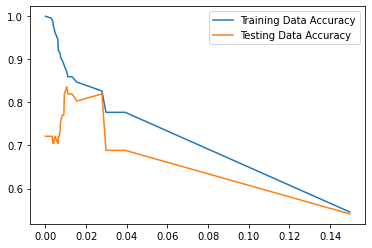

In [58]:
fig,ax=plt.subplots()
ax.plot(x,train_accuracy_list,label="Training Data Accuracy")
ax.plot(x,test_accuracy_list,label="Testing Data Accuracy")
ax.legend()

## testing evalution with prunning

In [66]:
prun_model=DecisionTreeClassifier(ccp_alpha=x[18])
prun_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.010439321444106135)

In [67]:
y_pred=prun_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
print('*'*89)
cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix",cnf)
print('*'*89)
cls_rep=classification_report(y_test,y_pred)
print("classification report",cls_rep)

accuracy 0.8360655737704918
*****************************************************************************************
confusion matrix [[22  6]
 [ 4 29]]
*****************************************************************************************
classification report               precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



## training data evalution

In [70]:
y_predict=prun_model.predict(x_train)
accuracy=accuracy_score(y_train,y_predict)
print("accuracy",accuracy)
print('*'*89)
cnf=confusion_matrix(y_train,y_predict)
print("confusion matrix",cnf)
print('*'*89)
cls_rep=classification_report(y_train,y_predict)
print("classification report",cls_rep)

accuracy 0.871900826446281
*****************************************************************************************
confusion matrix [[ 87  23]
 [  8 124]]
*****************************************************************************************
classification report               precision    recall  f1-score   support

           0       0.92      0.79      0.85       110
           1       0.84      0.94      0.89       132

    accuracy                           0.87       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.87      0.87       242



In [ ]:
## get generlize model by prunning so we will adopt it

In [72]:
plt.figure(figsize=(180,160))
plot_tree(prun_model,feature_names=x_train.columns,class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_without_HYP.png')

In [ ]:
# by doing prunning we avoid the overfitting and make complex model generlized model.

## Testing on single row

In [73]:
df.head(1).T

0
age        63.0
sex         1.0
cp          3.0
trestbps  145.0
chol      233.0
fbs         1.0
restecg     0.0
thalach   150.0
exang       0.0
oldpeak     2.3
slope       0.0
ca          0.0
thal        1.0
target      1.0

In [74]:
age=63
sex=1
cp=2.2
trestbps=138
chol=223
gbs=1
restecg=0
thalach=146
exang=0
oldpeak=1.89
slope=0.1
ca=0.2
thal=1

In [75]:
array=np.array([age,sex,cp,trestbps,chol,gbs,restecg,thalach,exang,oldpeak,slope,ca,thal])

In [76]:
prediction=prun_model.predict([array])[0]
prediction

C:\ANACONDA 64\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
# our model will predict that user has heart disease.

In [77]:
with open ("DT_prun_model.pkl","wb") as f:
    pickle.dump(prun_model,f)

In [79]:
json_data={"columns":list(x_train.columns)}

In [80]:
json_data

{'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [81]:
with open ("json_data.json","w") as f:
    json.dump(json_data,f)
    